### Create Database Connection and Set Configurations

In [ ]:
%%capture
%load_ext sql
%sql sqlite:///stores.db

In [2]:
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
%config SqlMagic.displaylimit = 100

### Introduction

This is a guided project : customer and product analysis using SQL presented by Dataquest Course as a part of course exercise. This project will be analyzing the Scale Model Cars database to answer some questions relating to priority products to restock based on low stock and high-sales performance, customers in top and bottom value as well as customers lifetime value.

#### The Scale Model Cars database schema is as follows : 

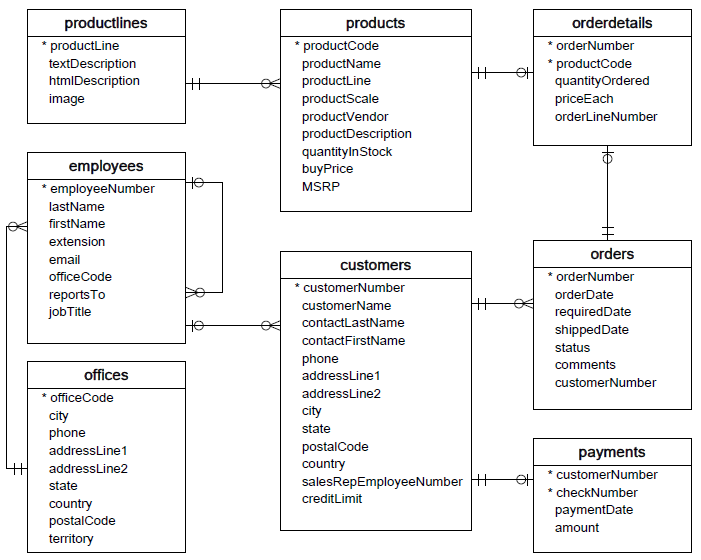

In [3]:
from IPython.display import Image
Image(filename='Database Schema Model Cars.png')

### Business Questions

1. Which products should be prioritized more to order based on their stock (low stock in inventory) and product performance (best selling)?

In [4]:
%%sql

WITH
product_perf AS (
SELECT
      productCode,
      CAST(SUM(quantityOrdered) AS FLOAT) AS ordered,
      ROUND(SUM(quantityOrdered*priceEach)) AS performance
  FROM orderdetails
 GROUP BY productCode
),

low_stock_products AS(
SELECT 
      products.productCode,
      products.productName,
      products.productLine,
      products.quantityInStock AS stock,
      ROUND(SUM(product_perf.ordered / products.quantityInStock),2) AS low_stock
 FROM products  
 JOIN product_perf  
   ON products.productCode = product_perf.productCode
GROUP BY products.productCode
ORDER BY low_stock
LIMIT 10
)

SELECT 
      low.productName, 
      low.productCode,
      low.productLine, 
      low.low_stock, 
      pr_perf.ordered, 
      low.stock, 
      pr_perf.performance
FROM  low_stock_products AS low
JOIN product_perf AS pr_perf
ON low.productCode = pr_perf.productCode
ORDER BY pr_perf.performance DESC


productName,productCode,productLine,low_stock,ordered,stock,performance
2002 Suzuki XREO,S12_2823,Motorcycles,0.1,1028.0,9997,135767.0
1976 Ford Gran Torino,S18_3482,Classic Cars,0.1,915.0,9127,121891.0
1995 Honda Civic,S18_1984,Classic Cars,0.09,917.0,9772,119051.0
1932 Model A Ford J-Coupe,S18_2325,Vintage Cars,0.1,957.0,9354,109992.0
1965 Aston Martin DB5,S18_1589,Classic Cars,0.1,914.0,9042,101778.0
1999 Indy 500 Monte Carlo SS,S18_2870,Classic Cars,0.1,855.0,8164,100770.0
1968 Dodge Charger,S12_3380,Classic Cars,0.1,925.0,9123,98719.0
America West Airlines B757-200,S700_2466,Planes,0.1,984.0,9653,89348.0
2002 Chevy Corvette,S24_3432,Classic Cars,0.09,894.0,9446,87405.0
1982 Ducati 996 R,S32_2206,Motorcycles,0.1,906.0,9241,33269.0


#### INSIGHT : 
Based on the data above, the priority best-selling products for restocking are predominantly from Classic Cars product line. Therefore the company should order more of these products. 

2.In order to cater different marketing and communciation strategies to customers. Please compute, how much profit each customer generates then categorize them accordingly.

  2.1 How much profit each customer generates?

In [8]:
%%sql 

SELECT 
      od.customerNumber, 
      SUM(quantityOrdered * (priceEach - buyPrice)) AS profit  
  FROM products pr
  JOIN orderdetails odd
    ON pr.productCode = odd.productCode
  JOIN orders od
    ON odd.orderNumber = od.orderNumber
   GROUP BY od.customerNumber
   ORDER BY profit DESC;

customerNumber,profit
141,326519.65999999986
124,236769.38999999998
151,72370.09000000001
114,70311.06999999999
119,60875.30000000001
148,60477.37999999999
187,60095.85999999999
323,60013.99
131,58669.10000000001
450,55931.369999999995


2.2 Which top 5 customers that generate high profit (VIP customers)?

In [13]:
%%sql 

SELECT 
       c.customerNumber,
       c.customername, 
       c.contactLastName, 
       c.contactFirstName,
       c.city,
       c.country, 
       SUM(quantityOrdered * (priceEach - buyPrice)) AS profit
  FROM products AS pr
  JOIN orderdetails AS odd
    ON pr.productCode = odd.productCode
  JOIN orders AS od
    ON odd.orderNumber = od.orderNumber
  JOIN customers AS c
    ON od.customerNumber=c.customerNumber
   GROUP BY od.customerNumber
   ORDER BY profit DESC
   LIMIT 5;

customerNumber,customerName,contactLastName,contactFirstName,city,country,profit
141,Euro+ Shopping Channel,Freyre,Diego,Madrid,Spain,326519.65999999986
124,Mini Gifts Distributors Ltd.,Nelson,Susan,San Rafael,USA,236769.38999999998
151,Muscle Machine Inc,Young,Jeff,NYC,USA,72370.09000000001
114,"Australian Collectors, Co.",Ferguson,Peter,Melbourne,Australia,70311.06999999999
119,La Rochelle Gifts,Labrune,Janine,Nantes,France,60875.30000000001


2.3 Which bottom 5 customers that generate the least profit (less-engaged customers)?

In [14]:
%%sql 

SELECT 
       c.customerNumber,
       c.customername, 
       c.contactLastName, 
       c.contactFirstName,
       c.city,
       c.country, 
       SUM(quantityOrdered * (priceEach - buyPrice)) AS profit
  FROM products AS pr
  JOIN orderdetails AS odd
    ON pr.productCode = odd.productCode
  JOIN orders AS od
    ON odd.orderNumber = od.orderNumber
  JOIN customers AS c
    ON od.customerNumber=c.customerNumber
   GROUP BY od.customerNumber
   ORDER BY profit
   LIMIT 5;

customerNumber,customerName,contactLastName,contactFirstName,city,country,profit
219,Boards & Toys Co.,Young,Mary,Glendale,USA,2610.870000000001
198,Auto-Moto Classics Inc.,Taylor,Leslie,Brickhaven,USA,6586.0199999999995
473,Frau da Collezione,Ricotti,Franco,Milan,Italy,9532.93
103,Atelier graphique,Schmitt,Carine,Nantes,France,10063.800000000001
489,"Double Decker Gift Stores, Ltd",Smith,Thomas,London,UK,10868.039999999999


3. What is the average amount of money a customer generate? 

In [16]:
%%sql 

WITH profit_per_cust AS (
SELECT 
      od.customerNumber, 
      SUM(quantityOrdered * (priceEach - buyPrice)) AS profit  
  FROM products pr
  JOIN orderdetails odd
    ON pr.productCode = odd.productCode
  JOIN orders od
    ON odd.orderNumber = od.orderNumber
   GROUP BY od.customerNumber)

SELECT AVG(profit) AS average_profit_per_customer
  FROM profit_per_cust;

average_profit_per_customer
39039.59438775511
